In [ ]:
!pip install nltk

  Using cached nltk-3.5.zip (1.4 MB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached regex-2020.11.13-cp38-cp38-win_amd64.whl (270 kB)
  Using cached tqdm-4.59.0-py2.py3-none-any.whl (74 kB)
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=9204e57ad04c5cc4a8dd4c8100fa61000adc3296995a299dfec30b6f4a3035ee
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


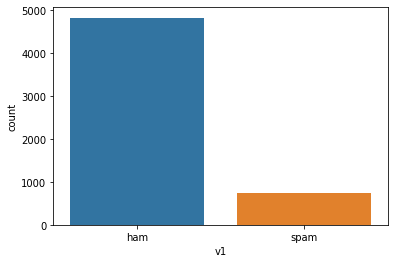

In [6]:
sns.countplot(df['v1'])
plt.show()

In [7]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # for lemmatization

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
len(df)

5572

In [11]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## Lemmatization

In [12]:
lem = []

for msg in range(len(df)):
    txt = re.sub('[^a-zA-Z]', ' ', df['v2'][msg])   # replace all non alphabets with ' '
    txt = txt.lower()                               # lower each sentence
    txt = txt.split()                               # split each sentence
    txt = [lemmatizer.lemmatize(word) for word in txt if word not in stopwords.words('english')]    # remove stopwords and lemmatize
    txt = ' '.join(txt)                             # join back all list of words into a sentence
    lem.append(txt)                                 # adding sentences to a list

In [13]:
lem[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [14]:
df['message'] = lem
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,message
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think go usf life around though


## Classification: Bag of Words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(lem).toarray()

In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# dummies for v1

y = pd.get_dummies(df['v1'])
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [18]:
# taking only the spam column

y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [19]:
print(X.shape, y.shape)

(5572, 3000) (5572,)


In [20]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [21]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4457, 3000) (4457,) (1115, 3000) (1115,)


### Naive Bayes

In [22]:
# training using Naive Bayes

from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
y_pred = modelNB.predict(X_test)

In [23]:
from IPython.display import HTML, display
import tabulate
print('CONFUSION MATRIX in SkLearn:')
print('0: Negative/Ham, 1: Positive/Spam')
print()
table = [['','Predicted 0','Predicted 1'],
         ['Actual 0','TN','FP'],
         ['Actual 1','FN','TP']]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

CONFUSION MATRIX in SkLearn:
0: Negative/Ham, 1: Positive/Spam



,Predicted 0,Predicted 1
Actual 0,TN,FP
Actual 1,FN,TP


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[948,  17],
       [  7, 143]])

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * (Recall * Precision) / (Recall + Precision)


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.89      0.95      0.92       150

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [26]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test, y_pred),2))

0.98


In [27]:
from sklearn.metrics import f1_score

print(round(f1_score(y_test, y_pred),2))

0.92


In [28]:
from sklearn.metrics import precision_score

print(round(precision_score(y_test, y_pred),2))

0.89


In [29]:
from sklearn.metrics import recall_score

print(round(recall_score(y_test, y_pred),2))

0.95


Above 3 results are when class = 1.

In [30]:
modelNB.get_params

<bound method BaseEstimator.get_params of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>

In [31]:
from sklearn.model_selection import cross_val_score

cross_val_score(modelNB, X, y, cv=5, scoring = 'accuracy')

array([0.97757848, 0.98744395, 0.98294434, 0.98294434, 0.97935368])

### KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

modelKN = KNeighborsClassifier(n_neighbors=3)
modelKN.fit(X_train, y_train)
y_pred = modelKN.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 68,  82]])

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       965
           1       1.00      0.55      0.71       150

    accuracy                           0.94      1115
   macro avg       0.97      0.77      0.84      1115
weighted avg       0.94      0.94      0.93      1115



### DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)
y_pred = modelDT.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[948,  17],
       [ 20, 130]])

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.88      0.87      0.88       150

    accuracy                           0.97      1115
   macro avg       0.93      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### SVM Classifier

In [38]:
from sklearn.svm import SVC

modelSV = SVC()
modelSV.fit(X_train, y_train)
y_pred = modelSV.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 26, 124]])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Classification: TFIDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features = 3000)
X = vec.fit_transform(lem).toarray()

In [42]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [44]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

### Naive Bayes

In [45]:
# training using Naive Bayes

from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
y_pred = modelNB.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[962,   3],
       [ 23, 127]])

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

modelKN = KNeighborsClassifier(n_neighbors=3)
modelKN.fit(X_train, y_train)
y_pred = modelKN.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 78,  72]])

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       965
           1       1.00      0.48      0.65       150

    accuracy                           0.93      1115
   macro avg       0.96      0.74      0.80      1115
weighted avg       0.94      0.93      0.92      1115



### DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)
y_pred = modelDT.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[943,  22],
       [ 27, 123]])

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       965
           1       0.85      0.82      0.83       150

    accuracy                           0.96      1115
   macro avg       0.91      0.90      0.90      1115
weighted avg       0.96      0.96      0.96      1115



### SVM Classifier

In [54]:
from sklearn.svm import SVC

modelSV = SVC()
modelSV.fit(X_train, y_train)
y_pred = modelSV.predict(X_test)

In [55]:
X_test[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 21, 129]])

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Spam messages Word Cloud

In [58]:
df_new = df[['v1','message']]
df_new.head()

,v1,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [59]:
df_spam = df_new[df_new['v1']=='spam']

In [60]:
corpus = ''

for msg in df_spam['message']:
    msg = str(msg)
    msg = msg.split()                               # split each sentence
    corpus += ' '.join(msg)+' '

In [61]:
corpus

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv winner valued network customer selected receivea prize reward claim call claim code kl valid hour mobile month u r entitled update latest colour mobile camera free call mobile update co free six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw xxxmobilemovieclub use credit click wap link next txt message click http wap xxxmobilemovieclub com n qjkgighjjgcbl england v macedonia dont miss goal team news txt ur national team eg england try wale scotland txt poboxox w wq thanks subscription ringtone uk mobile charged month please confirm replying yes reply charged rodger burn msg tried call reply sm free nokia mobile free camcorder please call delivery tomorrow sm ac sptv new jersey devil det

In [63]:
from wordcloud import WordCloud 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(corpus)

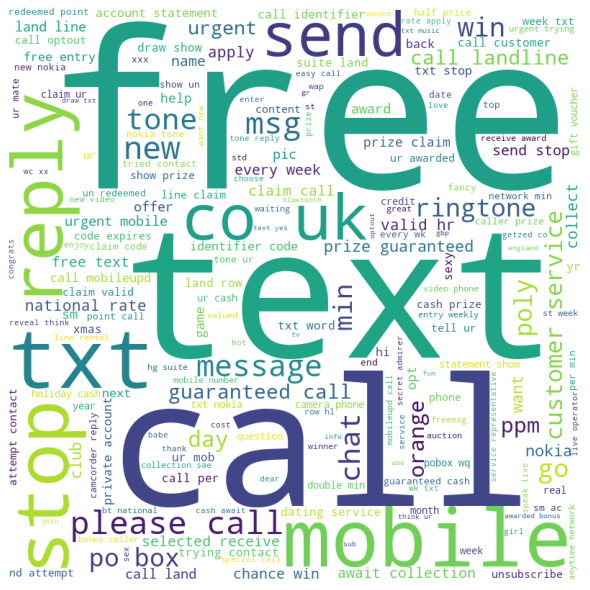

In [64]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Ham messages Word Cloud

In [65]:
df_ham = df_new[df_new['v1']=='ham']

In [66]:
corpus = ''

for msg in df_ham['message']:
    msg = str(msg)
    msg = msg.split()                               # split each sentence
    corpus += ' '.join(msg)+' '

In [67]:
corpus

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune gonna home soon want talk stuff anymore tonight k cried enough today searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh k watching eh u remember spell name yes v naughty make v wet fine way u feel way gota b seriously spell name going try month ha ha joking pay first lar da stock comin aft finish lunch go str lor ard smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho suck mark getting worried know sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love back amp packing car let know room

In [68]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(corpus)

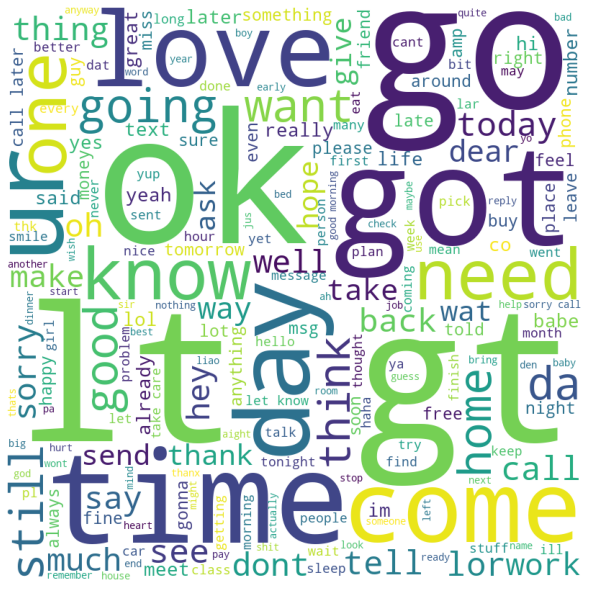

In [69]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Final Model using SVM

In [70]:
vec = TfidfVectorizer()

In [71]:
df_new.head()

,v1,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [72]:
X = df_new['message'].values
y = df_new['v1'].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [74]:
X_train = vec.fit_transform(X_train)

In [75]:
modelSV = SVC()
modelSV.fit(X_train, y_train)
X_test = vec.transform(X_test)
y_pred = modelSV.predict(X_test)

In [76]:
confusion_matrix(y_test, y_pred)

array([[964,   1],
       [ 21, 129]])

In [81]:
msgInput = 'claim your free rewards'
print('Entered message: ',msgInput)
msgInput = vec.transform([msgInput])
predict = modelSV.predict(msgInput)
if(predict[0]=='spam'):
  print("------------------------MESSAGE-IS-SPAM---------------------------")
else:
  print("------------------------MESSAGE-IS-HAM-----------------------------")

Entered message:  claim your free rewards
------------------------MESSAGE-IS-SPAM---------------------------


In [78]:
msgInput = 'hey how are you'
print('Entered message: ',msgInput)
msgInput = vec.transform([msgInput])
predict = modelSV.predict(msgInput)
if(predict[0]=='spam'):
  print("------------------------MESSAGE-IS-SPAM---------------------------")
else:
  print("------------------------MESSAGE-IS-HAM-----------------------------")

Entered message:  hey how are you
------------------------MESSAGE-IS-HAM-----------------------------


## Deep Learning

In [105]:
X = df_new['message'].values
y = df_new['v1'].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [107]:
vocab_size = 3000
batch_size = 32
epochs = 4
max_len = 25

In [108]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size)

tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train_new = pad_sequences(sequences, maxlen=max_len)

In [116]:
X_train_new

array([[   0,    0,    0, ...,    0,    0,  298],
       [   0,    0,    0, ...,  128, 1674,   21],
       [   0,    0,    0, ..., 1036,  284,  332],
       ...,
       [   0,    0,    0, ...,    0,    0,  884],
       [   0,    0,    0, ...,  199,  308,   91],
       [   0,    0,    0, ..., 1384,  164,  167]], dtype=int32)

In [117]:
X_train_new.shape

(4457, 25)

In [110]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         384000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 519,745
Trainable params: 519,745
Non-trainable params: 0
_________________________________________________________________


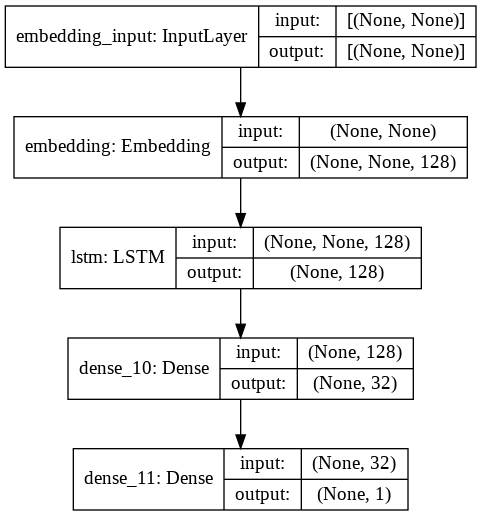

In [112]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [113]:
model.fit(X_train_new, y_train, batch_size=batch_size, epochs=epochs, verbose = 1)

Epoch 1/4


UnimplementedError: ignored

In [115]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   v1       5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features = 3000)
X = vec.fit_transform(lem).toarray()

In [101]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4457, 3000) (4457,) (1115, 3000) (1115,)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

In [102]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3000,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               1536512   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 1,668,097
Trainable params: 1,668,097
Non-trainable params: 0
_________________________________________________________________


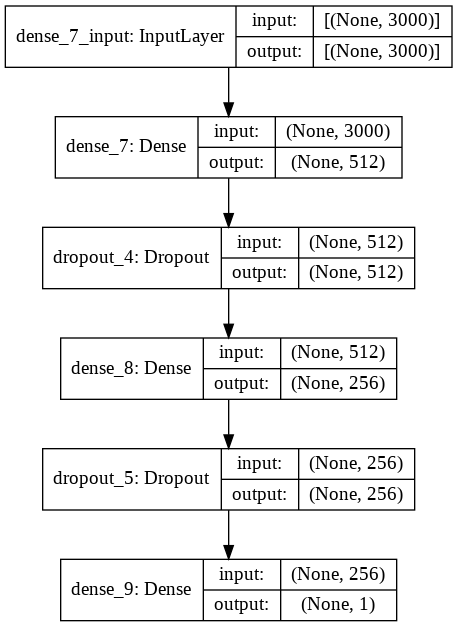

In [103]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [104]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, verbose=1)

Epoch 1/30


UnimplementedError: ignored

In [ ]:
# list all data in history
print(history.history.keys())

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred